In [63]:
#imports 
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing  # Public dataset loader
from sklearn.model_selection import train_test_split    # Train/test split
from sklearn.pipeline import Pipeline                  # Pipeline to prevent leakage
from sklearn.compose import ColumnTransformer          # Different preprocessing per column type
from sklearn.preprocessing import StandardScaler       # Feature scaling (important for SVR)
from sklearn.preprocessing import OneHotEncoder        # Convert categorical to one-hot vectors
from sklearn.impute import SimpleImputer 

from sklearn.linear_model import LinearRegression      # Multivariable regression model
from sklearn.svm import SVR                            # Support Vector Regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score


# data cleaning

In [51]:
data=fetch_california_housing(as_frame=True)
df=data.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
df.rename(columns={"MedHouseVal": "target"}, inplace=True)

In [53]:
print("\n[1) DATA CLEANING]")
print("Head:\n", df.head())                           # Display first rows                                     # Show data types and non-null counts


[1) DATA CLEANING]
Head:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [54]:
print("\nInfo:") 
print(df.info())
# - MedInc        median income in block group
#     - HouseAge      median house age in block group
#     - AveRooms      average number of rooms per household
#     - AveBedrms     average number of bedrooms per household
#     - Population    block group population
#     - AveOccup      average number of household members
#     - Latitude      block group latitude
#     - Longitude     block group longitude


Info:
<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [55]:
df.isna().sum()  #check missing values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

** imputation des valeurs manquentes : imputation moyenne /moyenne qui replace des valeurs numérique par la moyenne ou la médiane

In [56]:
df_clean=df.copy() # conserve les références interns 
rng=np.random.RandomState(42)
missing_idx=rng.choice(df_clean.index, size=50, replace=False) #rng générateurs de nombres aléatoire
df_clean.loc[missing_idx, "AveRooms"]=np.nan
df_clean

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [57]:
df_clean.isna().sum()

MedInc         0
HouseAge       0
AveRooms      50
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
target         0
dtype: int64

# EDA

In [58]:
print("\n[2) EDA]")
print("\nDescribe:\n", df_clean.describe())            # Basic statistics


[2) EDA]

Describe:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20590.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429720      1.096675   1425.476744   
std        1.899822     12.585558      2.476700      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440930      1.006079    787.000000   
50%        3.534800     29.000000      5.229575      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min       

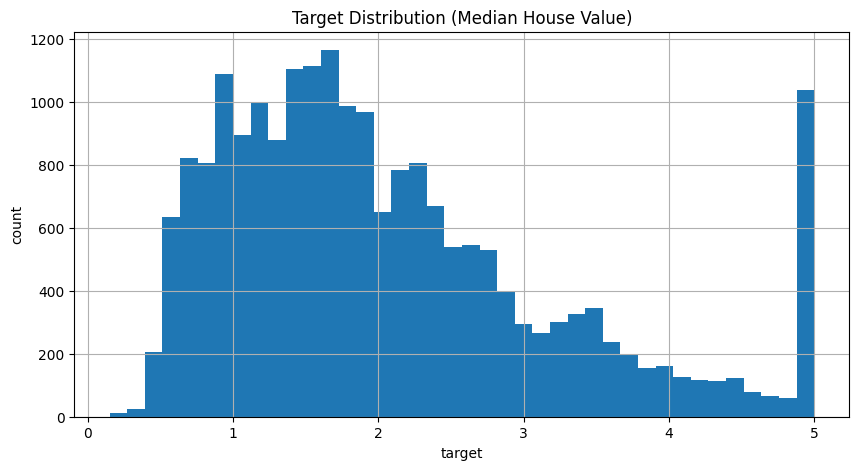

In [59]:
plt.figure(figsize=(10,5))                                          # Create new figure
df_clean["target"].hist(bins=40)                      # Histogram of target
plt.title("Target Distribution (Median House Value)") # Plot title
plt.xlabel("target")                                  # X label
plt.ylabel("count")                                   # Y label
plt.show()  

In [ ]:
corr=df_clean.corr(numeric_only=True)["target"].sort_values(ascending=False)
corr


MedInc        0.688075
HouseAge      0.105623
AveRooms      0.152048
AveBedrms    -0.046701
Population   -0.024650
AveOccup     -0.023737
Latitude     -0.144160
Longitude    -0.045967
target        1.000000
Name: target, dtype: float64

In [80]:
correlation=df.corr()

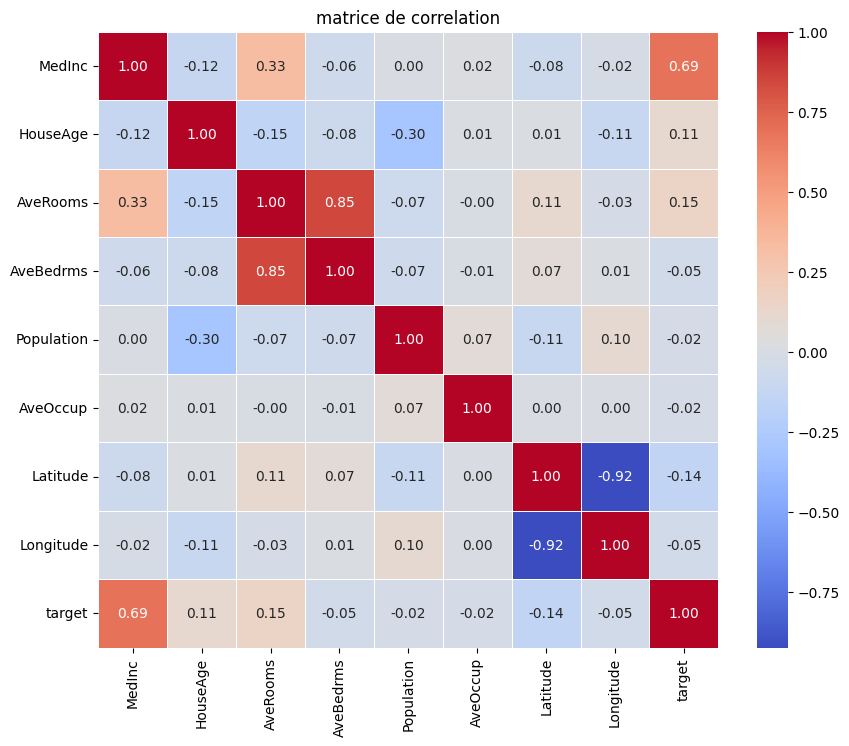

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5 )
plt.title("matrice de correlation")
plt.show()

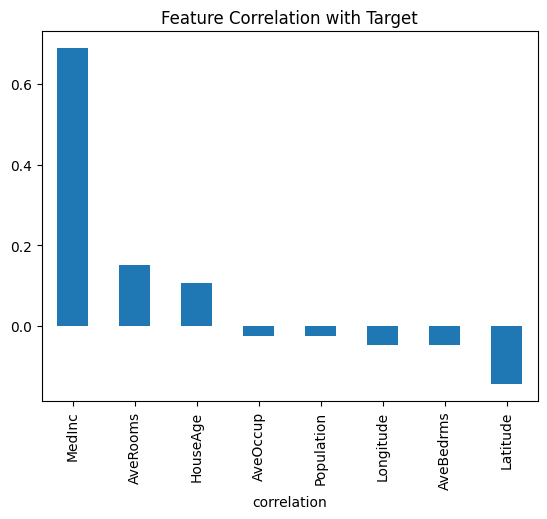

In [61]:
plt.figure()
corr.drop("target").plot(kind="bar")
plt.title("Feature Correlation with Target") 
plt.xlabel("correlation")
plt.show()

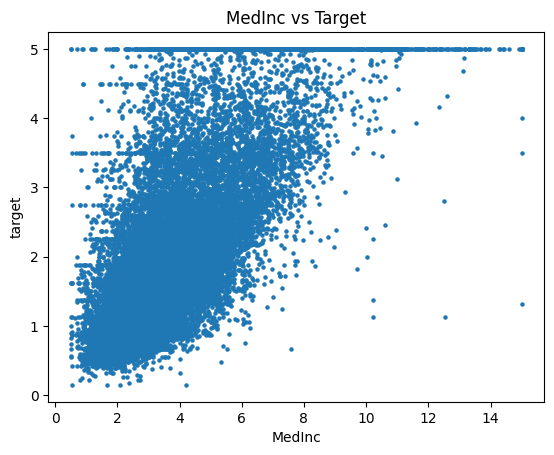

In [82]:
plt.figure()                                          # New figure
plt.scatter(df_clean["MedInc"], df_clean["target"], s=5)  # Scatter MedInc vs target
plt.title("MedInc vs Target")                         # Title
plt.xlabel("MedInc")                                  # X label
plt.ylabel("target")                                  # Y label
plt.show()  

# feature engineering

In [85]:
df_fe=df_clean.copy()
df_fe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [86]:
df_fe["RoomsPerHouseAge"] = df_fe["AveRooms"] / df_fe["HouseAge"].clip(lower=1)  # Avoid division by 0
df_fe["BedroomsPerRoom"] = df_fe["AveBedrms"] / df_fe["AveRooms"].clip(lower=1)  # Avoid division by 0
df_fe["PopulationPerOccupant"] = df_fe["Population"] / df_fe["AveOccup"].clip(lower=1)  # Avoid division by 0


In [88]:
df_fe["LatBand"]=pd.cut(
    df_fe["Latitude"],
    bins=4,
    labels=["B1", "B2", "B3", "B4"] 
)
#segmentation

In [93]:
# Separate predictors (X) and target (y)
X=df_fe.drop(columns=["target"]) #features only
y=df_fe["target"] #target only

In [94]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,RoomsPerHouseAge,BedroomsPerRoom,PopulationPerOccupant,LatBand
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,0.170345,0.146591,126.0,B3
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,0.297054,0.155797,1138.0,B3
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,0.159387,0.129516,177.0,B3
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,0.111872,0.184458,219.0,B3
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,0.120805,0.172096,259.0,B3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.201818,0.224625,330.0,B3
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.339669,0.215208,114.0,B3
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.306208,0.215173,433.0,B3
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.296084,0.219892,349.0,B3


In [96]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

# Model selection , preprocessing

In [ ]:
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()   # Numeric columns list.tolist()  
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()  # Categorical columns list

In [98]:
numeric_features

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude',
 'RoomsPerHouseAge',
 'BedroomsPerRoom',
 'PopulationPerOccupant']

In [99]:
categorical_features

['LatBand']

In [100]:
# Preprocessing for numeric columns: impute median + scale
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),     # Fill missing numeric values with median (computed on TRAIN only)
    ("scaler", StandardScaler())                       # Standardize features (fit on TRAIN only)
])


In [101]:
categorical_transformer=Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [102]:
preprocess=ColumnTransformer(
    transformers=[
        ("num",numeric_transformer, numeric_features),
        ("cat",categorical_transformer, categorical_features)
    ]
)

# model training

In [104]:
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=42)
print(f"Train size: {x_train.shape}, Test size: {x_test.shape}")  # Show sizes

Train size: (16512, 12), Test size: (4128, 12)



**A) Multivariable Linear Regression model (baseline)**

In [105]:
linreg_model = Pipeline(steps=[
    ("preprocess", preprocess),                        # Preprocess (fit on train only)
    ("model", LinearRegression())                      # Linear regression model
])

In [106]:
linreg_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

# B) SVR model (NO grid search, NO cross validation)

In [ ]:
svr_model= Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", SVR(kernel="rbf", C=10, gamma="scale",epsilon=0.1))
]) #rbf= radial basis function sert à projeter les données dans un espace de dimension plus élevéepour rendre une séparation linéaire possible

In [111]:
svr_model.fit(x_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers cont

# Evaluation d emodèle

In [119]:
def evaluate_regression(model, X_test, y_test, name="model"):
    """
    Evaluate a regression model on the test set using:
    - MAE
    - RMSE
    - R²
    Also plots Actual vs Predicted.
    """
    preds = model.predict(X_test)                      # Predict on test features

    mae = mean_absolute_error(y_test, preds)           # Compute MAE
    rmse = np.sqrt(mean_squared_error(y_test, preds))  # Compute RMSE
    r2 = r2_score(y_test, preds) 
    print(f"\n--- {name} ---")                         # Print model name
    print(f"MAE : {mae:.4f}")                          # Print MAE
    print(f"RMSE: {rmse:.4f}")                         # Print RMSE
    print(f"R^2 : {r2:.4f}")   

    plt.figure()                                       # New figure
    plt.scatter(y_test, preds, s=8)                    # Scatter actual vs predicted
    plt.title(f"{name}: Actual vs Predicted")          # Title
    plt.xlabel("Actual")                               # X label
    plt.ylabel("Predicted")                            # Y label
    plt.show() 
    return mae, rmse, r2


--- Linear Regression ---
MAE : 0.4955
RMSE: 0.6864
R^2 : 0.6404


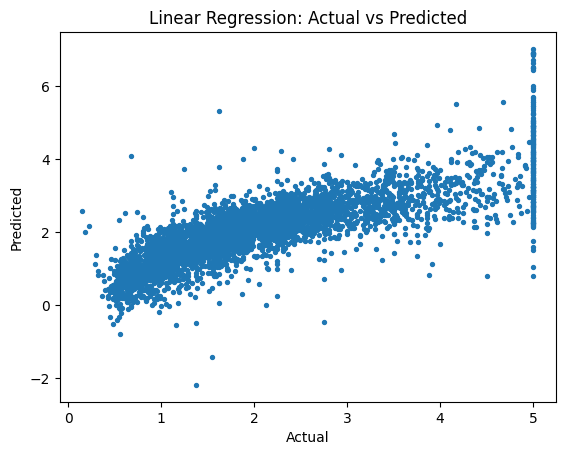

In [120]:
linreg_scores = evaluate_regression(                   # Evaluate baseline model
    linreg_model,                                      # Pipeline
    x_test,                                            # Test features
    y_test,                                            # Test target
    "Linear Regression"                                # Name
)


--- SVR (fixed params) ---
MAE : 0.3656
RMSE: 0.5544
R^2 : 0.7654


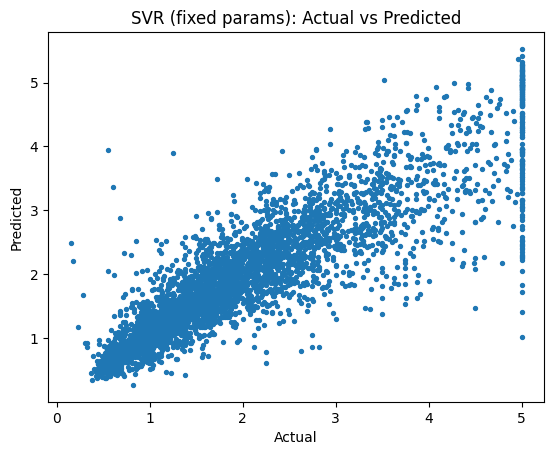

In [121]:
# Evaluate SVR
svr_scores = evaluate_regression(                      # Evaluate SVR model
    svr_model,                                         # Pipeline
    x_test,                                            # Test features
    y_test,                                            # Test target
    "SVR (fixed params)"                               # Name
)

In [122]:
# Create a comparison table
results = pd.DataFrame(                                # Build DataFrame of metrics
    [linreg_scores, svr_scores],                       # Rows = models
    columns=["MAE", "RMSE", "R2"],                      # Metric names
    index=["Linear Regression", "SVR (fixed params)"]   # Model names
)

print("\nComparison table:\n", results)                 # Print comparison table


Comparison table:
                          MAE      RMSE        R2
Linear Regression   0.495451  0.686443  0.640414
SVR (fixed params)  0.365605  0.554397  0.765450
